## Caso de estudio

**Cyclistic necesita una estrategia de marketing basada en datos para convertir usuarios ocasionales en miembros anuales.**

**Objetivo:** Maximizar el número de suscripciones anuales para el éxito futuro de la empresa.

**Desafío:** Identificar las diferencias en el uso de bicicletas entre usuarios ocasionales y miembros anuales.

**Estrategia:** Analizar datos de uso y crear visualizaciones profesionales para respaldar las recomendaciones.

## Cargue

In [1]:
import pandas as pd

La información fue obtenida desde https://divvybikes.com/system-data, esta información es de uso libre y pre-procesada excluyendo viajes del staff e información personal de los usuarios. 

Enlace de descarga: `https://divvy-tripdata.s3.amazonaws.com/202406-divvy-tripdata.zip`

In [2]:
df = pd.read_csv("data/202406-divvy-tripdata-raw.csv")
print("Cantidad de registros: ",len(df.index))

Cantidad de registros:  710721


La información contiene registros de Junio del año 2024 con datos como:
- Día y fecha de inicio del viaje
- Día y fecha de fin del viaje
- Estación de inicio del viaje
- Estación de finalización del viaje
- Tipo de ciclista (Miembro, Único viaje, y pase diario)

In [3]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,CDE6023BE6B11D2F,electric_bike,2024-06-11 17:20:06.289,2024-06-11 17:21:39.464,NaN,NaN,NaN,NaN,41.89,-87.65,41.89,-87.65,casual
1,462B48CD292B6A18,electric_bike,2024-06-11 17:19:21.567,2024-06-11 17:19:36.377,NaN,NaN,NaN,NaN,41.89,-87.65,41.89,-87.65,casual
2,9CFB6A858D23ABF7,electric_bike,2024-06-11 17:25:27.089,2024-06-11 17:30:13.035,NaN,NaN,NaN,NaN,41.93,-87.65,41.94,-87.65,casual
3,6365EFEB64231153,electric_bike,2024-06-11 11:53:50.769,2024-06-11 12:08:13.382,NaN,NaN,NaN,NaN,41.88,-87.64,41.88,-87.64,casual
4,BA0323C33134CBA8,electric_bike,2024-06-11 00:11:08.237,2024-06-11 00:11:22.998,NaN,NaN,NaN,NaN,41.94,-87.64,41.94,-87.64,casual


Los registros están conformados por 13 columnas
- ride_id: Código del viaje
- rideable_type: Tipo de bicicleta
- started_at: Fecha y hora de inicio
- ended_at: Fecha y hora de fin
- start_station_name: Nombre estación de inicio
- end_station_name: Nombre estación de fin
- start_station_id: Código estación de inicio
- end_station_id: Código estación de fin
- start_lat: Latitud de inicio
- start_lng: longitud de inicio
- end_lat: Latitud de fin
- end_lng: longitud de fin
- member_casual: Plan del usuario

## Limpieza

Para poder procesar la información, hay que asegurarse que todas las columnas con las que se va a trabajar tienen el tipo de dato adecuado y confirmar la integridad de la información

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710721 entries, 0 to 710720
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   ride_id             710721 non-null  object 
 1   rideable_type       710721 non-null  object 
 2   started_at          710721 non-null  object 
 3   ended_at            710721 non-null  object 
 4   start_station_name  566696 non-null  object 
 5   start_station_id    566696 non-null  object 
 6   end_station_name    562694 non-null  object 
 7   end_station_id      562694 non-null  object 
 8   start_lat           710721 non-null  float64
 9   start_lng           710721 non-null  float64
 10  end_lat             709597 non-null  float64
 11  end_lng             709597 non-null  float64
 12  member_casual       710721 non-null  object 
dtypes: float64(4), object(9)
memory usage: 70.5+ MB


Las columnas `started_at` y `ended_at` tienen un tipo de dato incorrecto

In [5]:
df['started_at'] = pd.to_datetime(df['started_at'])
df['ended_at'] = pd.to_datetime(df['ended_at'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 710721 entries, 0 to 710720
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   ride_id             710721 non-null  object        
 1   rideable_type       710721 non-null  object        
 2   started_at          710721 non-null  datetime64[ns]
 3   ended_at            710721 non-null  datetime64[ns]
 4   start_station_name  566696 non-null  object        
 5   start_station_id    566696 non-null  object        
 6   end_station_name    562694 non-null  object        
 7   end_station_id      562694 non-null  object        
 8   start_lat           710721 non-null  float64       
 9   start_lng           710721 non-null  float64       
 10  end_lat             709597 non-null  float64       
 11  end_lng             709597 non-null  float64       
 12  member_casual       710721 non-null  object        
dtypes: datetime64[ns](2), float64

Con las columnas corregidas, se van a agregar 3 columnas `ride_length`, `ride_length_seconds` y `day_of_week` con la duración del viaje, la duración del viaje en segundos y el día de la semana en que comenzó el viaje

### Creación columnas `ride_length` y `ride_length_seconds`

In [6]:
df['ride_length']=df['ended_at']-df['started_at']
df['ride_length_seconds'] = df['ride_length'].dt.total_seconds()
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_length_seconds
0,CDE6023BE6B11D2F,electric_bike,2024-06-11 17:20:06.289,2024-06-11 17:21:39.464,NaN,NaN,NaN,NaN,41.89,-87.65,41.89,-87.65,casual,0 days 00:01:33.175000,93.175
1,462B48CD292B6A18,electric_bike,2024-06-11 17:19:21.567,2024-06-11 17:19:36.377,NaN,NaN,NaN,NaN,41.89,-87.65,41.89,-87.65,casual,0 days 00:00:14.810000,14.810
2,9CFB6A858D23ABF7,electric_bike,2024-06-11 17:25:27.089,2024-06-11 17:30:13.035,NaN,NaN,NaN,NaN,41.93,-87.65,41.94,-87.65,casual,0 days 00:04:45.946000,285.946
3,6365EFEB64231153,electric_bike,2024-06-11 11:53:50.769,2024-06-11 12:08:13.382,NaN,NaN,NaN,NaN,41.88,-87.64,41.88,-87.64,casual,0 days 00:14:22.613000,862.613
4,BA0323C33134CBA8,electric_bike,2024-06-11 00:11:08.237,2024-06-11 00:11:22.998,NaN,NaN,NaN,NaN,41.94,-87.64,41.94,-87.64,casual,0 days 00:00:14.761000,14.761


### Creación columna `day_of_week`

In [7]:
df['day_of_week'] = df['started_at'].dt.day_name()
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_length_seconds,day_of_week
0,CDE6023BE6B11D2F,electric_bike,2024-06-11 17:20:06.289,2024-06-11 17:21:39.464,NaN,NaN,NaN,NaN,41.89,-87.65,41.89,-87.65,casual,0 days 00:01:33.175000,93.175,Tuesday
1,462B48CD292B6A18,electric_bike,2024-06-11 17:19:21.567,2024-06-11 17:19:36.377,NaN,NaN,NaN,NaN,41.89,-87.65,41.89,-87.65,casual,0 days 00:00:14.810000,14.810,Tuesday
2,9CFB6A858D23ABF7,electric_bike,2024-06-11 17:25:27.089,2024-06-11 17:30:13.035,NaN,NaN,NaN,NaN,41.93,-87.65,41.94,-87.65,casual,0 days 00:04:45.946000,285.946,Tuesday
3,6365EFEB64231153,electric_bike,2024-06-11 11:53:50.769,2024-06-11 12:08:13.382,NaN,NaN,NaN,NaN,41.88,-87.64,41.88,-87.64,casual,0 days 00:14:22.613000,862.613,Tuesday
4,BA0323C33134CBA8,electric_bike,2024-06-11 00:11:08.237,2024-06-11 00:11:22.998,NaN,NaN,NaN,NaN,41.94,-87.64,41.94,-87.64,casual,0 days 00:00:14.761000,14.761,Tuesday


Cantidad de valores nulos por columna

In [8]:
df.isnull().sum()

ride_id                     0
rideable_type               0
started_at                  0
ended_at                    0
start_station_name     144025
start_station_id       144025
end_station_name       148027
end_station_id         148027
start_lat                   0
start_lng                   0
end_lat                  1124
end_lng                  1124
member_casual               0
ride_length                 0
ride_length_seconds         0
day_of_week                 0
dtype: int64

El dataset utilizado en este análisis fue obtenido de un sitio de acceso libre, lo que implica que no se tiene la posibilidad de consultar o gestionar los datos faltantes con los responsables de su creación o mantenimiento. Dado que los valores nulos pueden afectar negativamente la calidad y la precisión de cualquier análisis o modelo que se construya a partir de este dataset, se ha decidido eliminar los registros que contienen valores nulos.

In [9]:
df = df.dropna()
df = df.reset_index(drop=True)
df.isnull().sum()

ride_id                0
rideable_type          0
started_at             0
ended_at               0
start_station_name     0
start_station_id       0
end_station_name       0
end_station_id         0
start_lat              0
start_lng              0
end_lat                0
end_lng                0
member_casual          0
ride_length            0
ride_length_seconds    0
day_of_week            0
dtype: int64

In [10]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,ride_length,ride_length_seconds,day_of_week
0,7FED56E160AFB564,classic_bike,2024-06-17 15:10:56.895,2024-06-17 15:12:30.744,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,0 days 00:01:33.849000,93.849,Monday
1,84260B28A7C9BBA1,classic_bike,2024-06-17 15:10:35.545,2024-06-17 15:12:12.398,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,0 days 00:01:36.853000,96.853,Monday
2,95367640BB007C8D,classic_bike,2024-06-08 16:11:10.249,2024-06-08 16:21:25.419,California Ave & Division St,13256,California Ave & Milwaukee Ave,13084,41.903029,-87.697474,41.922695,-87.697153,casual,0 days 00:10:15.170000,615.170,Saturday
3,4DF083CCDC1B950F,electric_bike,2024-06-07 21:33:36.986,2024-06-07 21:45:23.864,California Ave & Division St,13256,Wood St & Chicago Ave,637,41.903013,-87.697619,41.895634,-87.672069,casual,0 days 00:11:46.878000,706.878,Friday
4,BFAD51AB1A4887B2,classic_bike,2024-06-24 17:51:13.687,2024-06-24 17:56:09.707,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,0 days 00:04:56.020000,296.020,Monday


Código para exportar el archivo sin valores nulos y con las 3 columnas nuevas a un archivo xlsx

`df.to_excel("data/202406-divvy-tripdata-clean.xlsx", index=False)`

## Análisis

Duración promedio de los viajes

In [11]:
df['ride_length'].mean()

Timedelta('0 days 00:19:02.617775627')

Duración promedio de los viajes en miembros y casuales

In [12]:
df.groupby(['member_casual'])['ride_length'].mean().sort_values(ascending=False)

member_casual
casual   0 days 00:26:23.957422720
member   0 days 00:13:41.031050797
Name: ride_length, dtype: timedelta64[ns]

Duración más larga de un viaje

In [13]:
df.groupby(['member_casual'])['ride_length'].max().sort_values(ascending=False)

member_casual
casual   1 days 00:56:19.856000
member   1 days 00:48:12.280000
Name: ride_length, dtype: timedelta64[ns]

Días con más viajes ordenados de mayor cantidad a menor

In [14]:
df.groupby(['day_of_week'])['day_of_week'].count().sort_values(ascending=False)

day_of_week
Sunday       88009
Saturday     80271
Wednesday    70958
Thursday     67412
Friday       65410
Tuesday      61774
Monday       60492
Name: day_of_week, dtype: int64

Cantidad de miembros y casuales que han utilizado el servicio

In [15]:
df.groupby(['member_casual'])['member_casual'].count().sort_values(ascending=False)

member_casual
member    285959
casual    208367
Name: member_casual, dtype: int64

## Visualización

Las visualizaciones se hicieron con la herramienta Tableau

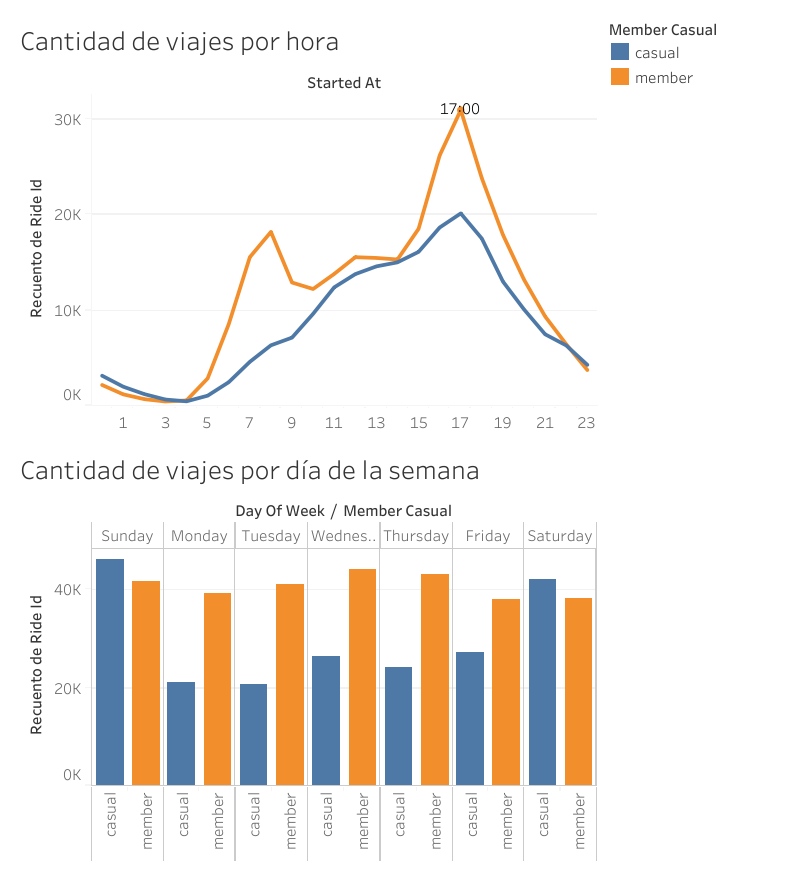

## Recomendaciones

- **Plan de horas pico:** Implementar un plan con precio reducido para viajes realizados entre las 17:00 y las 19:00 horas. Este plan podría ser exclusivo para miembros o estar disponible para todos los usuarios.
- **Pase de fin de semana:** Crear un pase especial que permita a los usuarios utilizar el servicio de forma ilimitada durante todo el fin de semana (sábado y domingo). Este pase podría tener un precio atractivo para los usuarios casuales que utilizan el servicio con mayor frecuencia durante esos días.